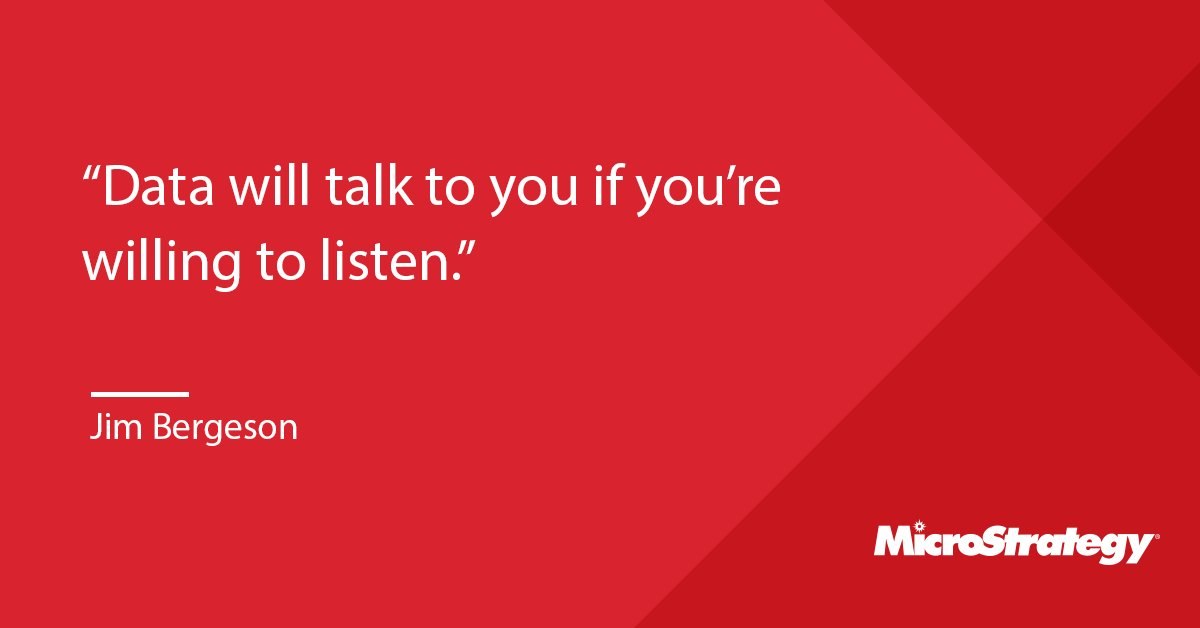

   
## How i am Listening this data:

This data is extracted from an Ecommerce (Books) website Database. This data shows the behaviour of a certain market segment (Book Lovers). Like following

* Which Book Genre they prefer to read
* Best Days for placing orders
* What are the Peak hours for orders placement
* Which Payment mode they love
* Which city have the most Readers.
* Best months for promoting / launching a book.

If i am going to launch my own Ecommerce startup, this data will be a **Bible** for me. 

## *Thumbs up for Gufhtugu Publications.*




# Table of Content:
    
* [Importing Libraries](#libraries)
* [Basics](#basics)
* [Data Cleaning and Wrangling](#cleaning)
    * [Removing Nan Values](#removingnan)
    * [Column : **"Book Name"** Cleaning](#bookname)
    * [Column : **"Order Date & Time"** Wrangling](#datetime)
    * [Column : **"Payment Method"** Wrangling](#payment)
    * [Column : **"City Name"** Cleaning](#cityname)
* [Feature Selection](#feature)
* [Data Visualization](#visualization)
    * [Column : **"Order Status"** Visualization](#osplotting)
    * [Column : **"Book Name"** Visualization](#booknameplotting)
    * [Column : **"Payment Method"** Visualization](#pmplotting)
    * [Column : **"Date Time"** Visualization](#dtplotting)
* [What we have **Extracted** so far](#extraction)

## I am going to launch my Book through Gufhtugu Publishers 

* [Click Here](#clickhere)

# <a id="libraries"></a>Libraries

In [ ]:
### For Data Analysis
import numpy as np 
import pandas as pd

### For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        


 # <a id="basics"></a>Basics

In [ ]:
df=pd.read_csv("../input/gufhtugu-publications-dataset-challenge/GP Orders - 5.csv",encoding="utf-8")
df.head()

In [ ]:
df.info()

 # <a id="removingnan"></a>Removing Nan
 

In [ ]:
df.isnull().sum()

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

# <a id="bookname"></a>Books Name Spliting 

In [ ]:
df["Book Name"]=df["Book Name"].str.split("/")
df=df.explode("Book Name",ignore_index=True)

In [ ]:
df.head()

# <a id="datetime"></a>Order Date & Time Wrangling

In [ ]:
df["Order Date & Time"]=pd.to_datetime(df["Order Date & Time"])

In [ ]:
df["Year"]=df["Order Date & Time"].dt.year
df["Month"]=df["Order Date & Time"].dt.month
df["DayofWeek"]=df["Order Date & Time"].dt.dayofweek
df["Date"]=df["Order Date & Time"].dt.day
df["Hour"]=df["Order Date & Time"].dt.hour

In [ ]:
dmap={0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"}
df["DayofWeek"]=df["DayofWeek"].map(dmap)

In [ ]:
df.head()

# <a id="payment"></a>Payment Method Wrangling

In [ ]:
df["Payment Method"].unique()

In [ ]:
df["Payment Method"].replace(to_replace=["Cash on Delivery (COD)","Cash on delivery"],value="COD",inplace=True)

# <a id="cityname"></a>City Name Cleaning (for TOP 5 Cities)

In [ ]:
df.head()

In [ ]:
df["City"]=df["City"].str.capitalize()

In [ ]:
df["City"].value_counts().head(10)

In [ ]:
def impute_city_name(city_name):
    
    if ("lahore" in city_name) or ("LAHORE" in city_name) or ("Lhr" in city_name):
        return "Lahore"
    
    elif ("karachi" in city_name) or ("KARACHI" in city_name) or ("Khi" in city_name):
        return "Karachi"
    
    elif ("islamabad" in city_name) or ("ISLAMABAD" in city_name) or ("Isl" in city_name):
        return "Islamabad"
    
    elif ("rawalpindi" in city_name) or ("RAWALPINDI" in city_name) or ("Rwp" in city_name):
        return "Rawalpindi"
    
    elif ("faisalabad" in city_name) or ("FAISALABAD" in city_name) or ("Fsd" in city_name):
        return "Faisalabad"
    
    else:
        return city_name

In [ ]:
df["City name"]=df["City"].apply(impute_city_name)

In [ ]:
df.head()

# <a id="feature"></a>Feature Selection 

In [ ]:
df.head() 

In [ ]:
df.drop(["Order Number","Order Date & Time","City","Total items","Total weight (grams)"],axis=1,inplace=True)

In [ ]:
df.head()   # Now we only have that columns which are necessary for us to analyze

# <a id="osplotting"></a>Order Status Visualization

In [ ]:
fig=px.pie(df,names="Order Status")
fig.show()

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x="Order Status",data=df,hue="Payment Method")

plt.xlabel("Order Status")
plt.ylabel("Numbers")

# <a id="booknameplotting"></a>Book Name Visualization

In [ ]:
best_selling_books=df[df["Order Status"]=="Completed"]["Book Name"].value_counts().head(5).reset_index()
fig=px.bar(best_selling_books,x="index",y="Book Name",color="index",title="5 Best Selling Books")
fig.update_layout(xaxis_title="Book Name",yaxis_title="Orders")
fig.show()

In [ ]:
most_cancelled_books=df[df["Order Status"]=="Cancelled"]["Book Name"].value_counts().head(5).reset_index()
fig=px.bar(data_frame=most_cancelled_books,x="index",y="Book Name",color="index",title="5 Most Cancelled Books")
fig.update_layout(xaxis_title="Book Name",yaxis_title="Orders")
fig.show()

In [ ]:
most_returned_books=df[df["Order Status"]=="Returned"]["Book Name"].value_counts().head(5).reset_index()
fig=px.bar(data_frame=most_returned_books,x="index",y="Book Name",color="index",title="5 Most Returened Books")
fig.update_layout(xaxis_title="Book Name",yaxis_title="Orders")
fig.show()

In [ ]:
most_returned_books_city=df[df["Order Status"]=="Returned"]["City name"].value_counts().head(5).reset_index()

fig=px.bar(data_frame=most_returned_books_city,x="index",y="City name",color="index",title="Cities with most returns")
fig.update_layout(xaxis_title="City Name",yaxis_title="Returns")
fig.show()

In [ ]:
most_Cancelled_books_city=df[df["Order Status"]=="Cancelled"]["City name"].value_counts().head(5).reset_index()

fig=px.bar(data_frame=most_Cancelled_books_city,x="index",y="City name",color="index",title="Cities with most Cancelled Orders")
fig.update_layout(xaxis_title="City Name",yaxis_title="Cancelled")
fig.show()

# <a id="pmplotting"></a>Payment Method Visualization

In [ ]:
fig=px.pie(df,names="Payment Method")
fig.show()

> **Extract**: 88.9% People prefer Cash on Delivery. This shows that our ecommerce sites still have to work alot for gainnng trust of customers.

# <a id="dtplotting"></a>Date Time Visualization

In [ ]:
px.pie(df,names="Month",labels="Month",title="Monthly Sale %")  

> **Extract** : Only January , November and December accounts for 53.7% of Total Sale Volume.

In [ ]:
px.pie(df,names="DayofWeek",title="Weekly Sale %")

> **Extract** : 54.1% of Sale orders were placed on Friday, Saturday and Sundays.

In [ ]:
px.pie(df,names="Hour",title="%of Sale Hourly")

> **Extract :** This Shows that 31.87% of sale orders are placed from **19-23(7PM till 11PM)**. In other words these are our Peak Hours for marketing.

# What we have Extracted So far:

1. More population in a city means more Sale orders. This is general pattern like any other ecommerce domain.This patterns remain the same in Books case too.
2. Almost 89% valued customers of Gufhtugu publisers used COD(Cash on delivery). This show that we are still in early phase of ecommerce.
3. For every 100 orders that are placed almost 6.5 orders are returned. That is way too much when we analyze delivery cost to Book Price ratio. Return can be because of 2 reasons .
    * Delivered a book that wasa not ordered (Ecommerce Staff Mistake)
    * Immature Behaviour of customer.(Customer Fault)
4. Best Selling books are of Technology Genre for this ecommerce site.
5. Best months for marketing are 11th,12th and 1st month. These are the months when usually people set goals. Or we can say that weather plays an important role in the behaiour of customers , because in our case cities with most sales have average temperature more that 30C.
6. Best days for promoting our books are Friday, saturday and Sunday.
7. While 7Pm to 11pm is the best time when our expected customers are on internet. **DO MARKET AT THAT TIME.**

# <a id="clickhere"></a>Parameters for Effective Books Marketing

### If i ever Published a book, i will remember following points learned from this Dataset

1. Will launch a Technology Genre Book
2. Will launch on 10th month so i could be ready to promote on 11th,12th and 1st month.
3. Will do more markeitng on friday, saturday and sunday.
4. Will follow peak hours 7pm till 11pm.
5. Will prefer to market in big cities of each province.
6. Last but not the least Book should be **GOOD & Valueable for Readers.**